## Read and Clean data

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
sales = pd.read_csv("data.csv", usecols=[
    "Product ID",
    "Product Name",
    "Cathegorie",
    "Product Type",
    "Regions",
    "Where",
    "Additional service ",
    "Unit price ",
    "Sales",
    "Quantity",
    "Sales Last Year",
    "Views",
    "Views Last Year",
    "Quantity Last Year",
    "duration"
])

def sanitize_numbers(df):
    return pd.to_numeric(df.str.replace('Rs.||\s|€|-','', regex=True).str.replace(',', '.')).replace(np.nan, 0)

sales = sales.rename(columns={
    "Unit price ": "Price",
    "Product Name": "Name",
    "Product ID": "Id",
    "Regions": "Region",
    "Cathegorie": "Category",
    "Product Type": "Type",
    "Where": "Location",
    "duration": "Duration",
    "Additional service ": "Additional Service"
})

sales["Price"] = sanitize_numbers(sales["Price"])
sales["Sales"] = sanitize_numbers(sales["Sales"])
sales["Sales Last Year"] = sanitize_numbers(sales["Sales Last Year"])
sales["Views"] = sanitize_numbers(sales["Views"])
sales["Views Last Year"] = sanitize_numbers(sales["Views Last Year"])
sales["Views Last Year"] = sales["Views Last Year"]
sales["Quantity"] = sanitize_numbers(sales["Quantity"])
sales["Quantity Last Year"] = sanitize_numbers(sales["Quantity Last Year"])
sales["Name"] = sales["Name"].astype("string")
sales["Category"] = sales["Category"].astype("category")
sales["Type"] = sales["Type"].astype("string")
sales["Region"] = sales["Region"].astype("string")
sales["Location"] = sales["Location"].astype("string")
sales["Additional Service"] = sales["Additional Service"].astype("string")


## Basic description

In [52]:
sales.describe(exclude=["int64", "string", "category"])

,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
count,289.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,39.010381,371.962630,3417.973486,631.177453,17.139875,1733.129958,606.592902,9.200418
std,21.668667,633.333879,17987.235829,3104.479209,87.996216,9544.780526,3427.975840,52.401467
min,10.000000,29.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,154.450000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,215.900000,221.550000,82.000000,1.000000,0.000000,42.000000,0.000000
75%,60.000000,359.400000,1098.940000,296.500000,6.000000,457.665000,295.500000,2.000000
max,150.000000,7531.900000,227698.100000,56225.000000,1519.000000,130537.920000,61171.000000,871.000000


# Analysis: Aggregates (Categories, Regions, Duration) vs Indicators (Sales, Quantities, Conversion Rate, Product Types)

## --- Categories ---

### Categories Weight in last year's Sales


total Sales last year: 830169.25 euros

                           Sales Last Year (in euros)  Weight (in %)
Category                                                            
Astronaute                                       0.00           0.00
montgolfière / ballon                            0.00           0.00
simulateur de chute libre                        0.00           0.00
Simulateur de vol                             1914.75           0.23
avion de chasse                               9082.83           1.09
ULM                                          60566.50           7.30
Avion                                        83980.33          10.12
Hélicoptère                                 171365.51          20.64
montgolfière                                503259.33          60.62


Text(0.5, 1.0, 'Category repartition in Last Year Sales')

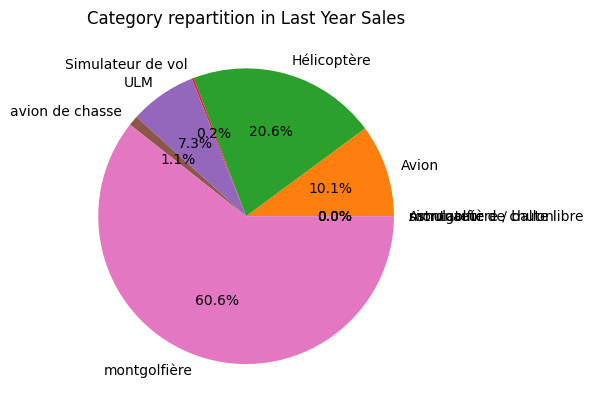

In [53]:
sales_by_category = sales.groupby("Category")["Sales"].sum()
sales_by_category_last_year = sales.groupby("Category")["Sales Last Year"].sum()
categories = sales_by_category.keys()

print(sales_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category_last_year, labels=sales_by_category_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Sales")


### Categories Weight in this year's Sales



total Sales this year: 1637209.3 euros

                           Sales (in euros)  Weight (in %)
Category                                                  
Astronaute                             0.00           0.00
montgolfière / ballon                  0.00           0.00
simulateur de chute libre              0.00           0.00
Simulateur de vol                   3379.95           0.21
avion de chasse                     8937.02           0.55
Avion                              73772.90           4.51
ULM                                91299.87           5.58
Hélicoptère                       230993.12          14.11
montgolfière                     1228826.44          75.06


Text(0.5, 1.0, 'Category repartition in This Year Sales')

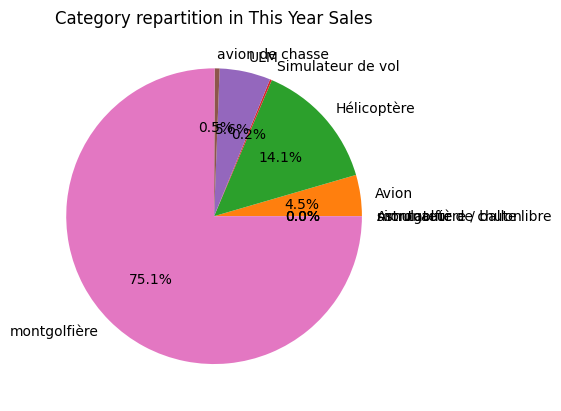

In [54]:
print(sales_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Sales")

### Sales evolution by Category

                           Sales Last Year (in euros)  Sales (in euros)  \
Category                                                                  
Avion                                        83980.33          73772.90   
avion de chasse                               9082.83           8937.02   
Hélicoptère                                 171365.51         230993.12   
ULM                                          60566.50          91299.87   
Simulateur de vol                             1914.75           3379.95   
montgolfière                                503259.33        1228826.44   
Astronaute                                       0.00              0.00   
montgolfière / ballon                            0.00              0.00   
simulateur de chute libre                        0.00              0.00   

                           Evolution (in %)  
Category                                     
Avion                                -12.15  
avion de chasse                     

Text(0.5, 1.0, 'Sales (in euros) by Category by Year')

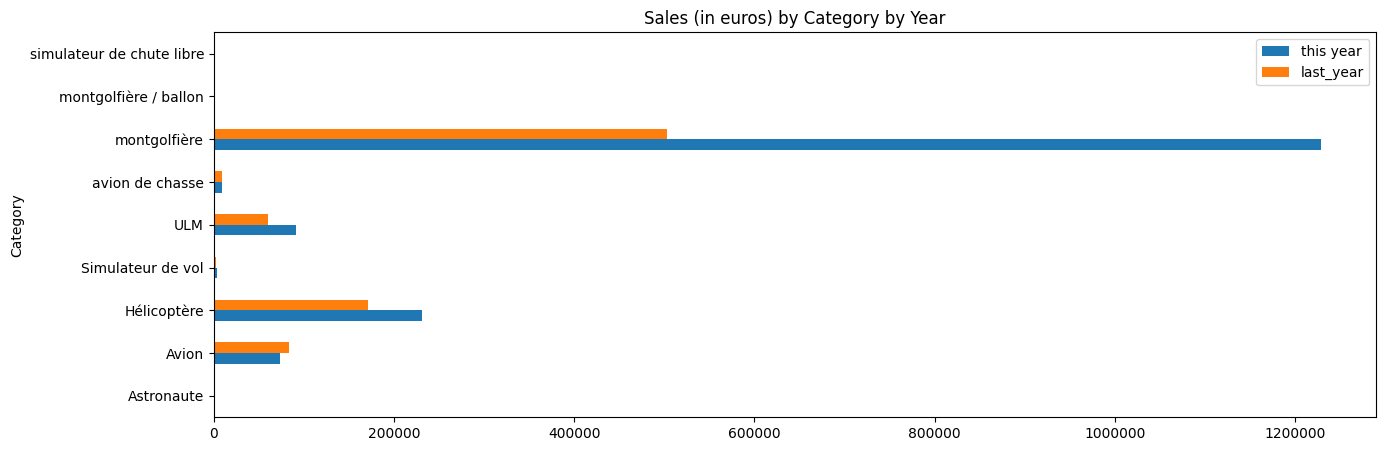

In [78]:
from matplotlib.ticker import FormatStrFormatter

sales_evo_by_category = pd.concat([sales_by_category_last_year, sales_by_category], axis=1)
percentage = (sales_evo_by_category[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.sort_values().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_category, "last_year":sales_by_category_last_year}, index=categories)
ax = df.plot.barh(figsize=(15, 5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
ax.set_title("Sales (in euros) by Category by Year")

### Categories Weight in last year's Quantities

total Quantity last year: 4407.0 units

                           Sales Last Year (in quantity)  Weight (in %)
Category                                                               
Astronaute                                           0.0           0.00
montgolfière / ballon                                0.0           0.00
simulateur de chute libre                            0.0           0.00
avion de chasse                                      4.0           0.09
Simulateur de vol                                   19.0           0.43
Avion                                              578.0          13.12
Hélicoptère                                        791.0          17.95
ULM                                                814.0          18.47
montgolfière                                      2201.0          49.94


Text(0.5, 1.0, 'Category repartition in Last Year Quantity')

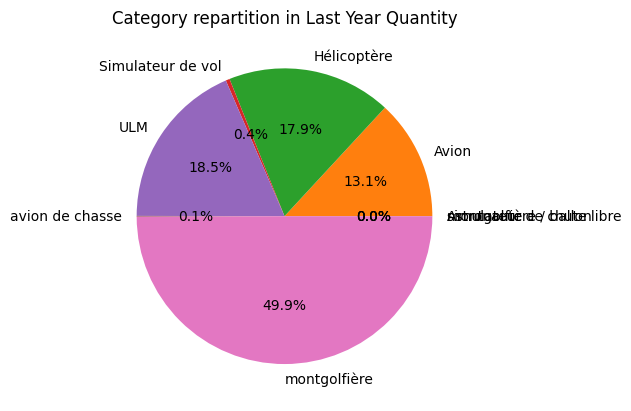

In [82]:
quantity_by_category = sales.groupby("Category")["Quantity"].sum()
quantity_by_category_last_year = sales.groupby("Category")["Quantity Last Year"].sum()
categories = quantity_by_category.keys()

print(quantity_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category_last_year, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Quantities")

### Categories Weight in this year's Quantities

total Quantity: 8210.0 units

                           Sales (in quantity)  Weight (in %)
Category                                                     
Astronaute                                 0.0           0.00
montgolfière / ballon                      0.0           0.00
simulateur de chute libre                  0.0           0.00
avion de chasse                            3.0           0.04
Simulateur de vol                         34.0           0.41
Avion                                    582.0           7.09
ULM                                     1034.0          12.59
Hélicoptère                             1188.0          14.47
montgolfière                            5369.0          65.40


Text(0.5, 1.0, 'Category repartition in This Year Quantities')

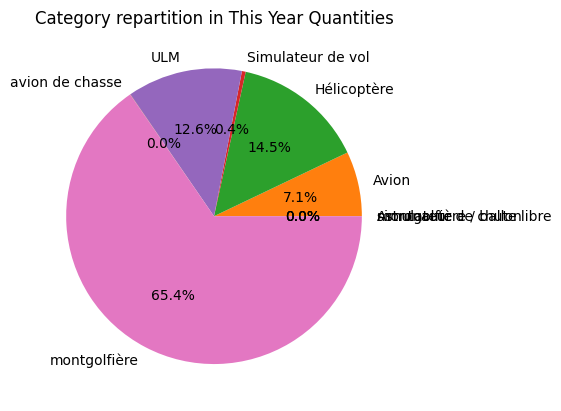

In [81]:
print(quantity_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Quantities")

### Quantities evolution by Category

                           Sales Last Year (in quantity)  Sales (in quantity)  \
Category                                                                        
avion de chasse                                      4.0                  3.0   
Avion                                              578.0                582.0   
ULM                                                814.0               1034.0   
Hélicoptère                                        791.0               1188.0   
Simulateur de vol                                   19.0                 34.0   
montgolfière                                      2201.0               5369.0   
Astronaute                                           0.0                  0.0   
montgolfière / ballon                                0.0                  0.0   
simulateur de chute libre                            0.0                  0.0   

                           Evolution (in %)  
Category                                     
avion de chasse 

Text(0.5, 1.0, 'Sales (in quantity) by Category by Year')

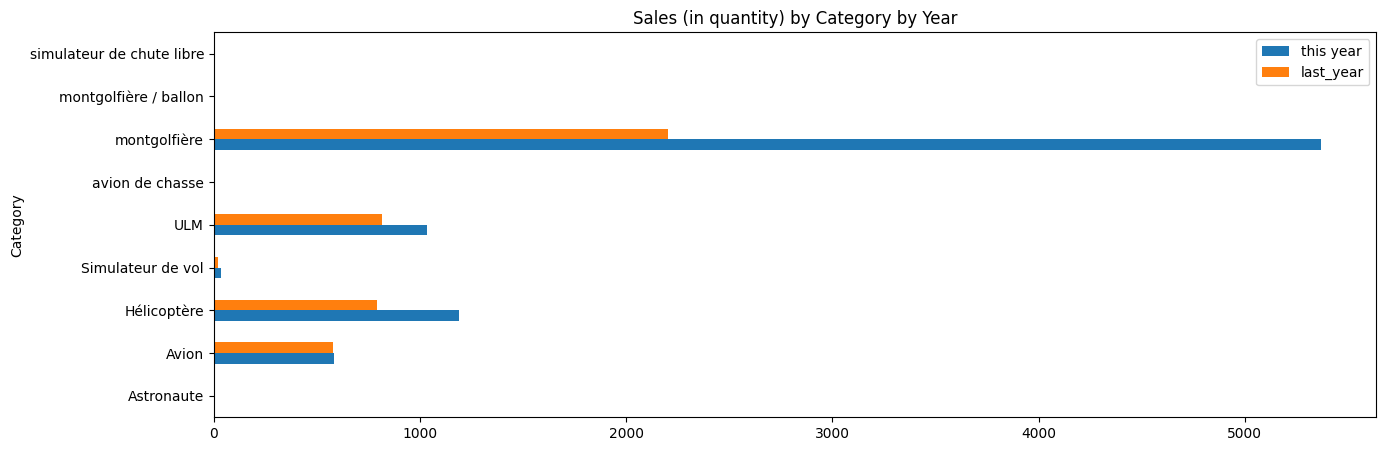

In [83]:
quantities_evo_by_category = pd.concat([quantity_by_category_last_year, quantity_by_category], axis=1)
percentage = (quantities_evo_by_category[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_category, "last_year":quantity_by_category_last_year}, index=categories)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales (in quantity) by Category by Year")

### Conversion Rate Evolution By Category

                           Views Last Year  Quantity Last Year Conversion Rate
Category                                                                      
Astronaute                           335.0                 0.0            0.0%
simulateur de chute libre             15.0                 0.0            0.0%
avion de chasse                     5440.0                 4.0           0.07%
montgolfière                      169042.0              2201.0            1.3%
Hélicoptère                        51810.0               791.0           1.53%
Avion                              29706.0               578.0           1.95%
Simulateur de vol                    919.0                19.0           2.07%
ULM                                33291.0               814.0           2.45%
montgolfière / ballon                  0.0                 0.0            nan%


                              Views  Quantity Conversion Rate
Category                                                     
Astro

Text(0.5, 1.0, 'Conversion Rate Evolution By Category')

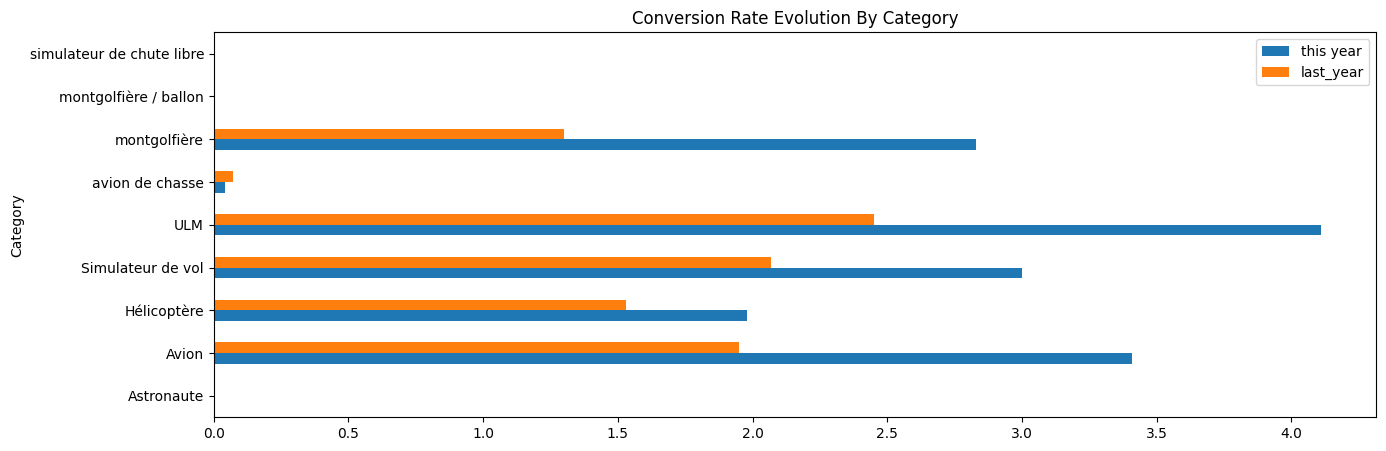

In [59]:
sales["Conversion Rate"] =  sales["Quantity"] * 100 / sales["Views"]
sales["Conversion Rate Last Year"] =  sales["Quantity Last Year"] * 100 / sales["Views Last Year"]

views_by_category = sales.groupby("Category")["Views"].sum()
views_by_category_last_year = sales.groupby("Category")["Views Last Year"].sum()

conversion_rate_by_category = pd.Series((quantity_by_category * 100 / views_by_category).round(2), name="Conversion Rate")
conversion_rate_by_category_last_year = pd.Series((quantity_by_category_last_year * 100 / views_by_category_last_year).round(2), name="Conversion Rate")


print(pd.concat([views_by_category_last_year, quantity_by_category_last_year, conversion_rate_by_category_last_year.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

print("\n")
print(pd.concat([views_by_category, quantity_by_category, conversion_rate_by_category.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

df = pd.DataFrame({"this year": conversion_rate_by_category, "last_year":conversion_rate_by_category_last_year}, index=categories)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Conversion Rate Evolution By Category")

## --- Regions ---


### Regions Weight in last year's Sales

Region
Bretagne                        0.00
Franche-Comté                   0.00
Grand Est                       0.00
Pays de la Loire              782.92
Bourgogne-Franche-Comté      1494.83
hors france                  4790.83
Hauts-de-France              7935.17
Occitanie                   10929.57
PACA & Corse                12512.50
Paris & Île-de-France       23511.01
Normandie                   31604.17
Nouvelle-Aquitaine          34097.49
Auvergne-Rhône-Alpes        99454.25
Centre-Val de Loire        129761.34
France entière             473295.17
Name: Sales Last Year, dtype: float64


Text(0.5, 1.0, "Regions repartition in last year's Sales")

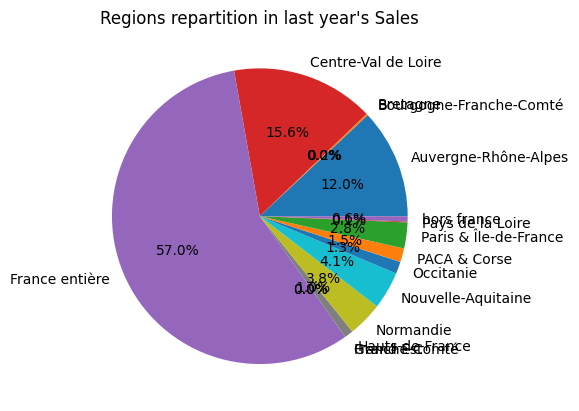

In [60]:
sales_by_region = sales.groupby("Region")["Sales"].sum()
sales_by_region_last_year = sales.groupby("Region")["Sales Last Year"].sum()
regions = sales_by_region.keys()

print(sales_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region_last_year, labels=sales_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Sales")

### Regions weight in this year's Sales

Region
Franche-Comté                 998.20
hors france                  4047.99
Pays de la Loire             4695.01
Bretagne                     5007.68
PACA & Corse                12673.17
Grand Est                   18537.76
Hauts-de-France             22175.77
Occitanie                   27124.78
Normandie                   39126.36
Bourgogne-Franche-Comté     39540.09
Paris & Île-de-France       45698.93
Nouvelle-Aquitaine          48995.70
Auvergne-Rhône-Alpes       155318.22
Centre-Val de Loire        536574.16
France entière             676695.48
Name: Sales, dtype: float64


Text(0.5, 1.0, "Regions repartition in this year's Sales")

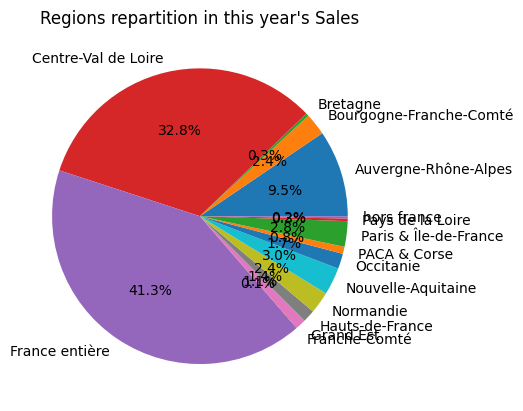

In [61]:
print(sales_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region, labels=sales_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Sales")

### Sales evolution by Region

                         Sales Last Year      Sales  Evolution (in %)
Region                                                               
hors france                      4790.83    4047.99            -15.51
PACA & Corse                    12512.50   12673.17              1.28
Normandie                       31604.17   39126.36             23.80
France entière                 473295.17  676695.48             42.98
Nouvelle-Aquitaine              34097.49   48995.70             43.69
Auvergne-Rhône-Alpes            99454.25  155318.22             56.17
Paris & Île-de-France           23511.01   45698.93             94.37
Occitanie                       10929.57   27124.78            148.18
Hauts-de-France                  7935.17   22175.77            179.46
Centre-Val de Loire            129761.34  536574.16            313.51
Pays de la Loire                  782.92    4695.01            499.68
Bourgogne-Franche-Comté          1494.83   39540.09           2545.12
Bretagne            

Text(0.5, 1.0, 'Sales (in euros) by Region by Year')

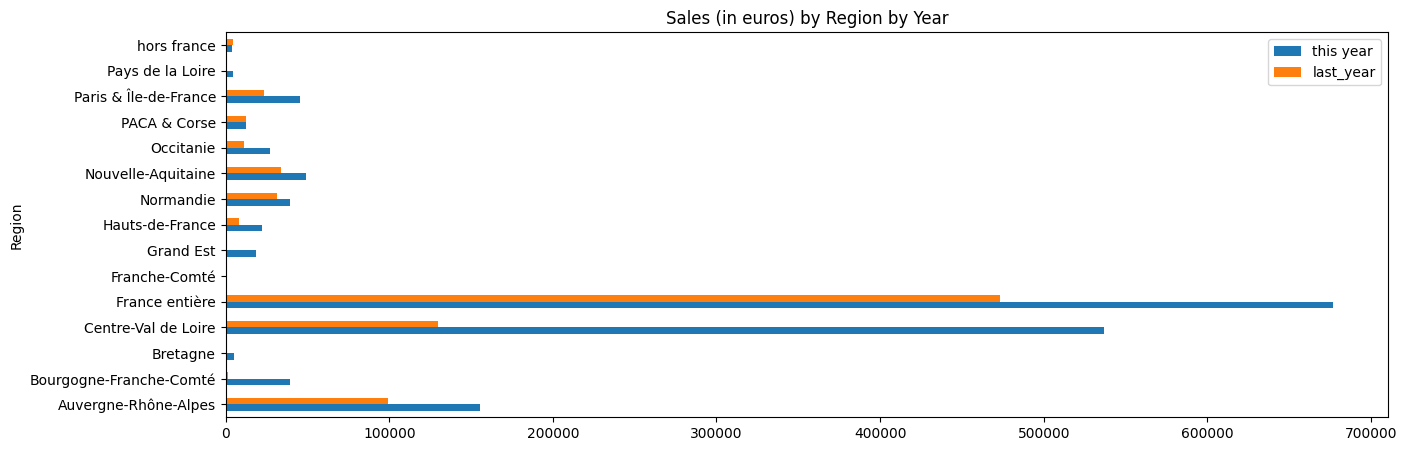

In [62]:
sales_evo_by_region = pd.concat([sales_by_region_last_year, sales_by_region], axis=1)
percentage = (sales_evo_by_region[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_region, "last_year":sales_by_region_last_year}, index=regions)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales (in euros) by Region by Year")

### Regions Weight in last year's Quantities

Region
Bretagne                      0.0
Franche-Comté                 0.0
Grand Est                     0.0
hors france                   2.0
Pays de la Loire              5.0
Bourgogne-Franche-Comté      11.0
Occitanie                    61.0
PACA & Corse                 66.0
Hauts-de-France             112.0
Paris & Île-de-France       180.0
Nouvelle-Aquitaine          217.0
Normandie                   252.0
Auvergne-Rhône-Alpes        419.0
Centre-Val de Loire         573.0
France entière             2509.0
Name: Quantity Last Year, dtype: float64


Text(0.5, 1.0, "Regions repartition in last year's Quantities")

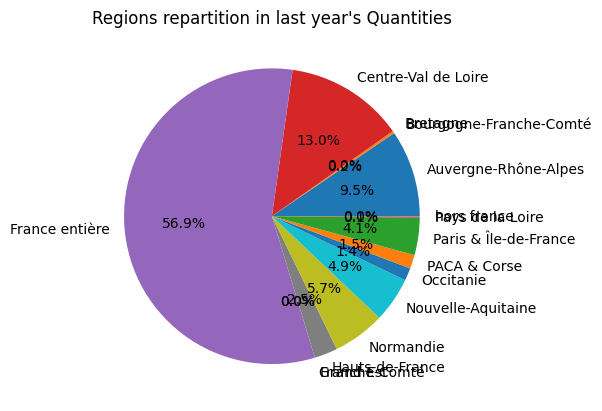

In [63]:
quantity_by_region = sales.groupby("Region")["Quantity"].sum()
quantity_by_region_last_year = sales.groupby("Region")["Quantity Last Year"].sum()
regions = quantity_by_region.keys()

print(quantity_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region_last_year, labels=quantity_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Quantities")

### Regions Weight in this year's Quantities


Region
hors france                   3.0
Franche-Comté                 4.0
Bretagne                     31.0
Pays de la Loire             31.0
Grand Est                    65.0
PACA & Corse                 69.0
Occitanie                   105.0
Bourgogne-Franche-Comté     192.0
Nouvelle-Aquitaine          291.0
Normandie                   304.0
Hauts-de-France             310.0
Paris & Île-de-France       397.0
Auvergne-Rhône-Alpes        702.0
Centre-Val de Loire        2025.0
France entière             3681.0
Name: Quantity, dtype: float64


Text(0.5, 1.0, "Regions repartition in this year's Quantities")

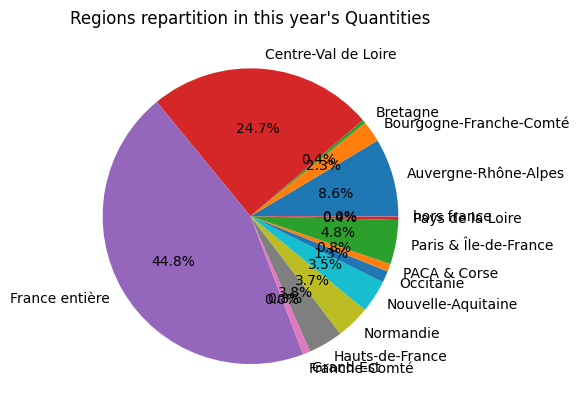

In [64]:
print(quantity_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region, labels=quantity_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Quantities")

### Quantities evolution by Region

                         Quantity Last Year  Quantity  Evolution (in %)
Region                                                                 
PACA & Corse                           66.0      69.0              4.55
Normandie                             252.0     304.0             20.63
Nouvelle-Aquitaine                    217.0     291.0             34.10
France entière                       2509.0    3681.0             46.71
hors france                             2.0       3.0             50.00
Auvergne-Rhône-Alpes                  419.0     702.0             67.54
Occitanie                              61.0     105.0             72.13
Paris & Île-de-France                 180.0     397.0            120.56
Hauts-de-France                       112.0     310.0            176.79
Centre-Val de Loire                   573.0    2025.0            253.40
Pays de la Loire                        5.0      31.0            520.00
Bourgogne-Franche-Comté                11.0     192.0           

Text(0.5, 1.0, 'Sales (in quantities) evolution by Region by Year')

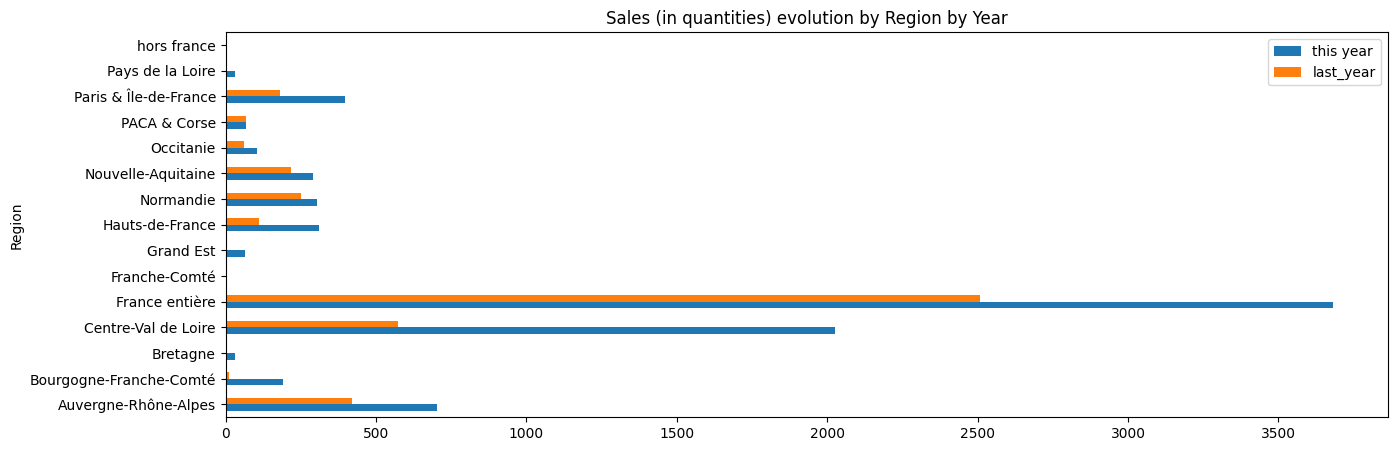

In [65]:
quantity_by_region_evo = pd.concat([quantity_by_region_last_year, quantity_by_region], axis=1)
percentage = (quantity_by_region_evo[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_region, "last_year":quantity_by_region_last_year}, index=regions)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales (in quantities) evolution by Region by Year")

### Conversion Rate evolution by Region

                         Views Last Year  Quantity Last Year Conversion Rate
Region                                                                      
Franche-Comté                       34.0                 0.0            0.0%
hors france                       5583.0                 2.0           0.04%
Bourgogne-Franche-Comté           1811.0                11.0           0.61%
Pays de la Loire                   551.0                 5.0           0.91%
Centre-Val de Loire              42628.0               573.0           1.34%
France entière                  180055.0              2509.0           1.39%
PACA & Corse                      3866.0                66.0           1.71%
Nouvelle-Aquitaine               12459.0               217.0           1.74%
Paris & Île-de-France             9080.0               180.0           1.98%
Hauts-de-France                   5012.0               112.0           2.23%
Auvergne-Rhône-Alpes             17970.0               419.0           2.33%

Text(0.5, 1.0, 'Conversion Rate Evolution By Region')

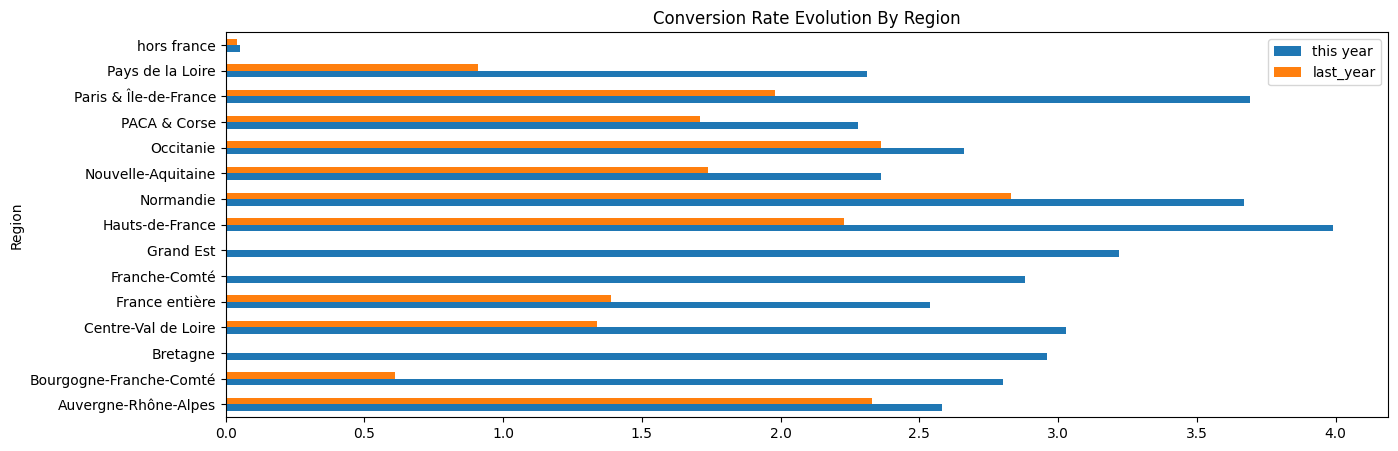

In [66]:
views_by_region = sales.groupby("Region")["Views"].sum()
views_by_region_last_year = sales.groupby("Region")["Views Last Year"].sum()

conversion_rate_by_region = pd.Series((quantity_by_region * 100 / views_by_region).round(2), name="Conversion Rate")
conversion_rate_by_region_last_year = pd.Series((quantity_by_region_last_year * 100 / views_by_region_last_year).round(2), name="Conversion Rate")


print(pd.concat([views_by_region_last_year, quantity_by_region_last_year, conversion_rate_by_region_last_year.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

print("\n")
print(pd.concat([views_by_region, quantity_by_region, conversion_rate_by_region.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

df = pd.DataFrame({"this year": conversion_rate_by_region, "last_year":conversion_rate_by_region_last_year}, index=regions)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Conversion Rate Evolution By Region")

## --- Duration ---

### Weight of Duration in last year's Sales

Duration
10.0         0.00
80.0         0.00
70.0         0.00
50.0         0.00
105.0        0.00
150.0        0.00
22.0         0.00
15.0         0.00
12.0         0.00
35.0       183.25
75.0       666.50
40.0       913.08
90.0      4874.08
25.0      8752.59
45.0     15270.67
20.0     42974.59
30.0     61478.92
60.0     64135.08
Name: Sales Last Year, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Sales")

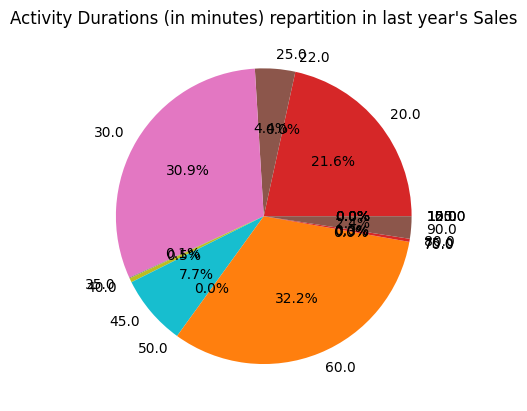

In [67]:
sales_by_duration = sales.groupby("Duration")["Sales"].sum()
sales_by_duration_last_year = sales.groupby("Duration")["Sales Last Year"].sum()
durations = sales_by_duration.keys()

print(sales_by_duration_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_duration_last_year, labels=sales_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in last year's Sales")

### Weight of Duration in this year's Sales

Duration
12.0          0.00
105.0         0.00
22.0          0.00
35.0          0.00
40.0        384.88
70.0        559.65
150.0       793.22
50.0       1049.65
15.0       1550.73
75.0       1568.58
10.0       3590.07
90.0      11901.40
45.0      12231.81
25.0      12956.41
30.0      57989.86
20.0      79963.59
80.0     112809.80
60.0     309198.65
Name: Sales, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Sales")

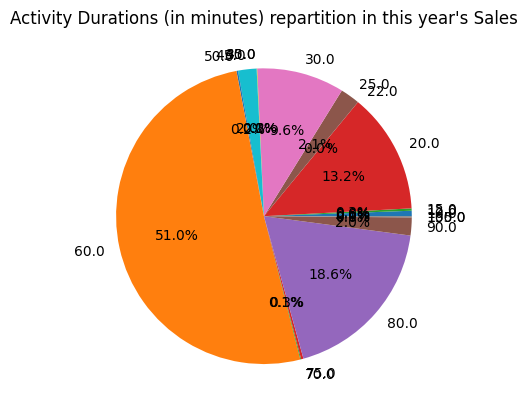

In [68]:
print(sales_by_duration.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_duration, labels=sales_by_duration.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in this year's Sales")

### Sales evolution by Duration

Duration
35.0     -100.0%
40.0     -57.85%
45.0      -19.9%
30.0      -5.68%
25.0      48.03%
20.0      86.07%
75.0     135.35%
90.0     144.18%
60.0     382.11%
10.0        inf%
15.0        inf%
50.0        inf%
70.0        inf%
80.0        inf%
150.0       inf%
Name: Sales, dtype: object


Text(0.5, 1.0, 'Sales evolution (in euros) by Duration by Year')

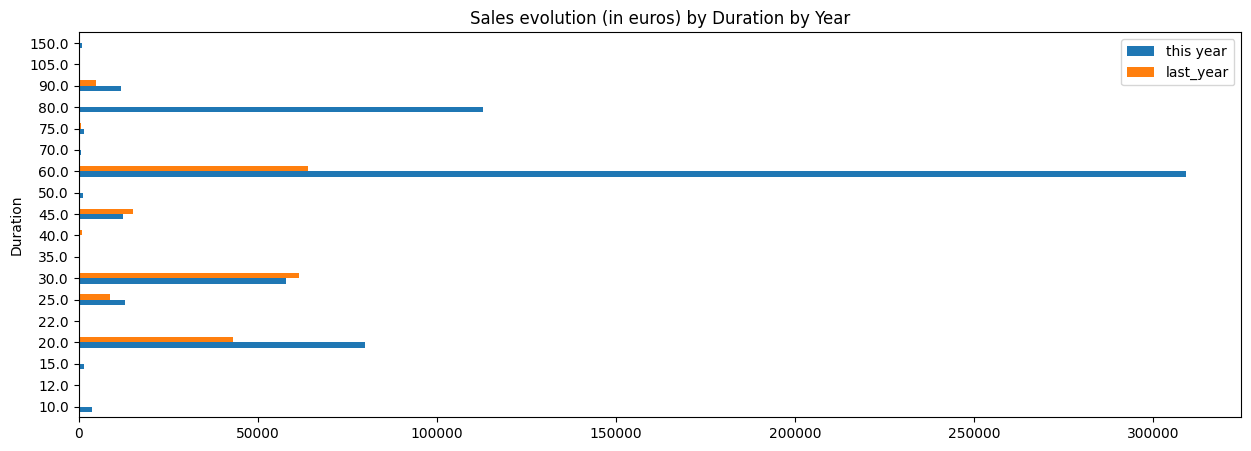

In [69]:
sales_by_duration_evo = pd.concat([sales_by_duration_last_year, sales_by_duration], axis=1)
percentage = (sales_by_duration_evo[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.sort_values().dropna().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_duration, "last_year":sales_by_duration_last_year}, index=durations)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in euros) by Duration by Year")

### Weight of Duration in last year's Quantities


Duration
10.0       0.0
80.0       0.0
70.0       0.0
50.0       0.0
105.0      0.0
150.0      0.0
22.0       0.0
15.0       0.0
12.0       0.0
35.0       1.0
75.0       2.0
40.0       3.0
90.0      18.0
25.0      30.0
45.0      88.0
30.0     228.0
20.0     231.0
60.0     378.0
Name: Quantity Last Year, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Quantities")

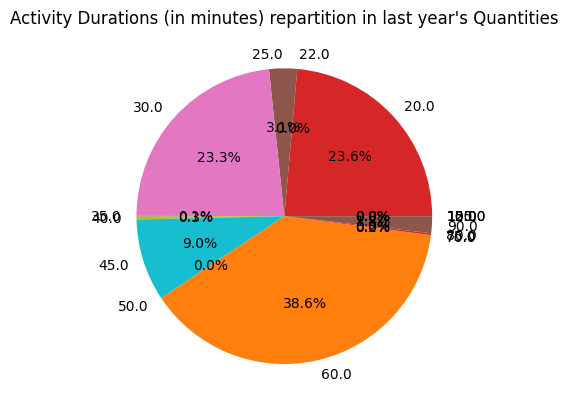

In [70]:
quantity_by_duration = sales.groupby("Duration")["Quantity"].sum()
quantity_by_duration_last_year = sales.groupby("Duration")["Quantity Last Year"].sum()
durations = quantity_by_duration.keys()

print(quantity_by_duration_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_duration_last_year, labels=quantity_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in last year's Quantities")

### Weight of Duration in this year's Quantities


Duration
12.0        0.0
105.0       0.0
35.0        0.0
22.0        0.0
40.0        1.0
150.0       1.0
50.0        4.0
70.0        4.0
75.0        5.0
15.0        9.0
10.0       32.0
25.0       41.0
90.0       44.0
45.0       66.0
30.0      279.0
20.0      516.0
80.0      771.0
60.0     1012.0
Name: Quantity, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Quantities")

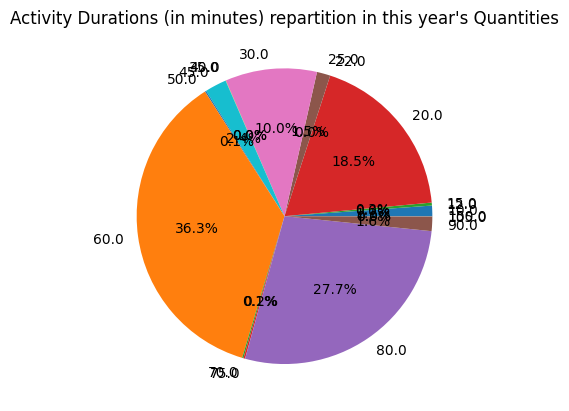

In [71]:
print(quantity_by_duration.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_duration, labels=quantity_by_duration.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in this year's Quantities")

### Quantities evolution by Duration

Duration
35.0     -100.0%
40.0     -66.67%
45.0      -25.0%
30.0      22.37%
25.0      36.67%
20.0     123.38%
90.0     144.44%
75.0      150.0%
60.0     167.72%
10.0        inf%
15.0        inf%
50.0        inf%
70.0        inf%
80.0        inf%
150.0       inf%
Name: Quantity, dtype: object


Text(0.5, 1.0, 'Sales evolution (in quantities) by Duration by Year')

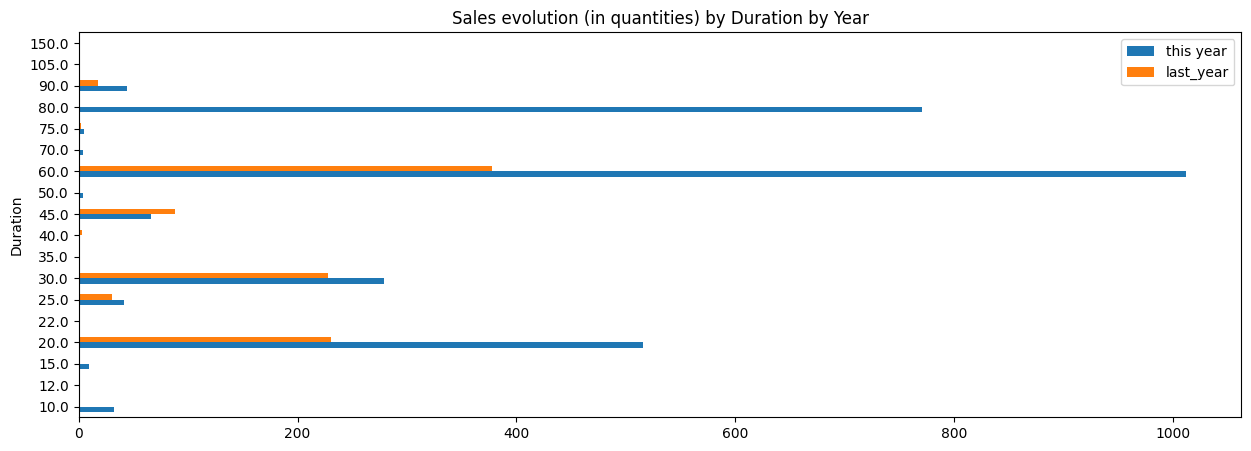

In [72]:
quantity_by_duration_evo = pd.concat([quantity_by_duration_last_year, quantity_by_duration], axis=1)
percentage = (quantity_by_duration_evo[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.sort_values().dropna().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_duration, "last_year":quantity_by_duration_last_year}, index=durations)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in quantities) by Duration by Year")

## --- Conversion Rate ---



## --- Product Types ---